In [100]:
import pandas as pd

In [101]:
dataset = pd.read_csv(r"C:\Users\User\Machine Learning\ML Project Final\Air Quality Index Prediction\app\city_day.csv")
dataset.head(3)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN


In [102]:
dataset.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

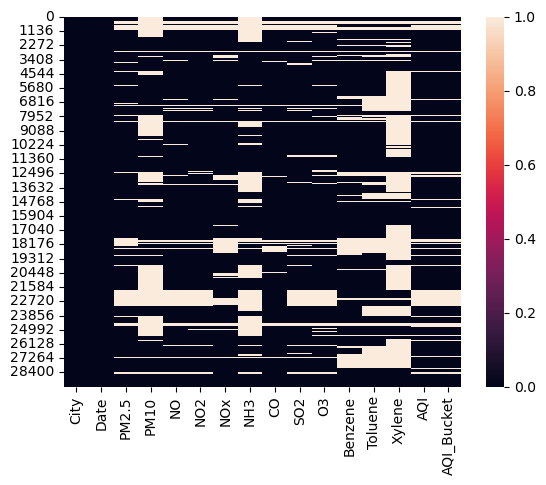

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(dataset.isnull())
plt.show()

In [104]:
dataset.drop(columns=["City","Date","NO","NOx","NH3","Benzene","Toluene","Xylene","AQI_Bucket"], inplace=True)

In [105]:
dataset.dropna(inplace=True)
dataset.head(3)

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
1595,37.55,122.41,85.12,15.08,163.01,48.23,281.0
1596,33.97,116.32,79.71,14.67,91.26,51.86,330.0
1597,35.48,130.07,77.61,18.02,98.35,38.99,356.0


In [106]:
dataset.isnull().sum()

PM2.5    0
PM10     0
NO2      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [107]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

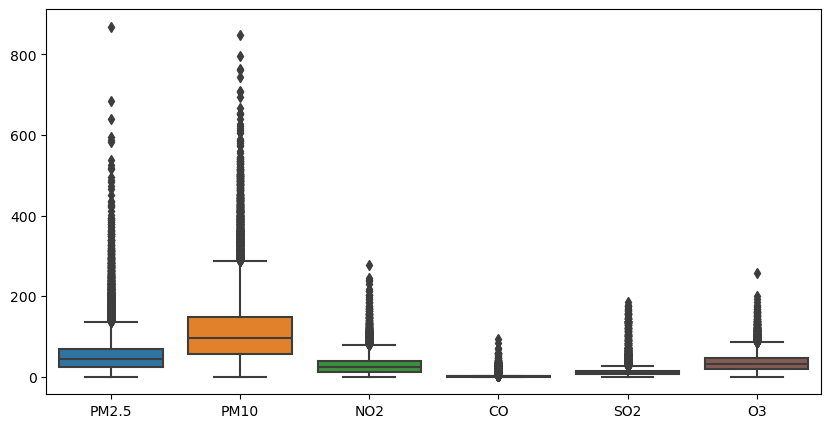

In [108]:
#checking there are outlier present or not
x_cols = ["PM2.5","PM10","NO2","CO","SO2","O3",]
plt.figure(figsize=(10,5))
sns.boxplot(data=dataset[x_cols])
plt.show()

In [109]:
# from sklearn.preprocessing import StandardScaler
# ss=StandardScaler()
# columns = ["PM2.5", "PM10", "NO2", "CO", "SO2", "O3"]
# x_scaled = ss.fit(dataset[columns])
# dataset[columns] = pd.DataFrame(ss.transform(dataset[columns]), columns=columns, index=dataset.index)

In [110]:
dataset.head(3)

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
1595,37.55,122.41,85.12,15.08,163.01,48.23,281.0
1596,33.97,116.32,79.71,14.67,91.26,51.86,330.0
1597,35.48,130.07,77.61,18.02,98.35,38.99,356.0


In [111]:
# #Removing duplicate values from the dataset
dataset.drop_duplicates(inplace=True)
dataset.shape

(16010, 7)

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

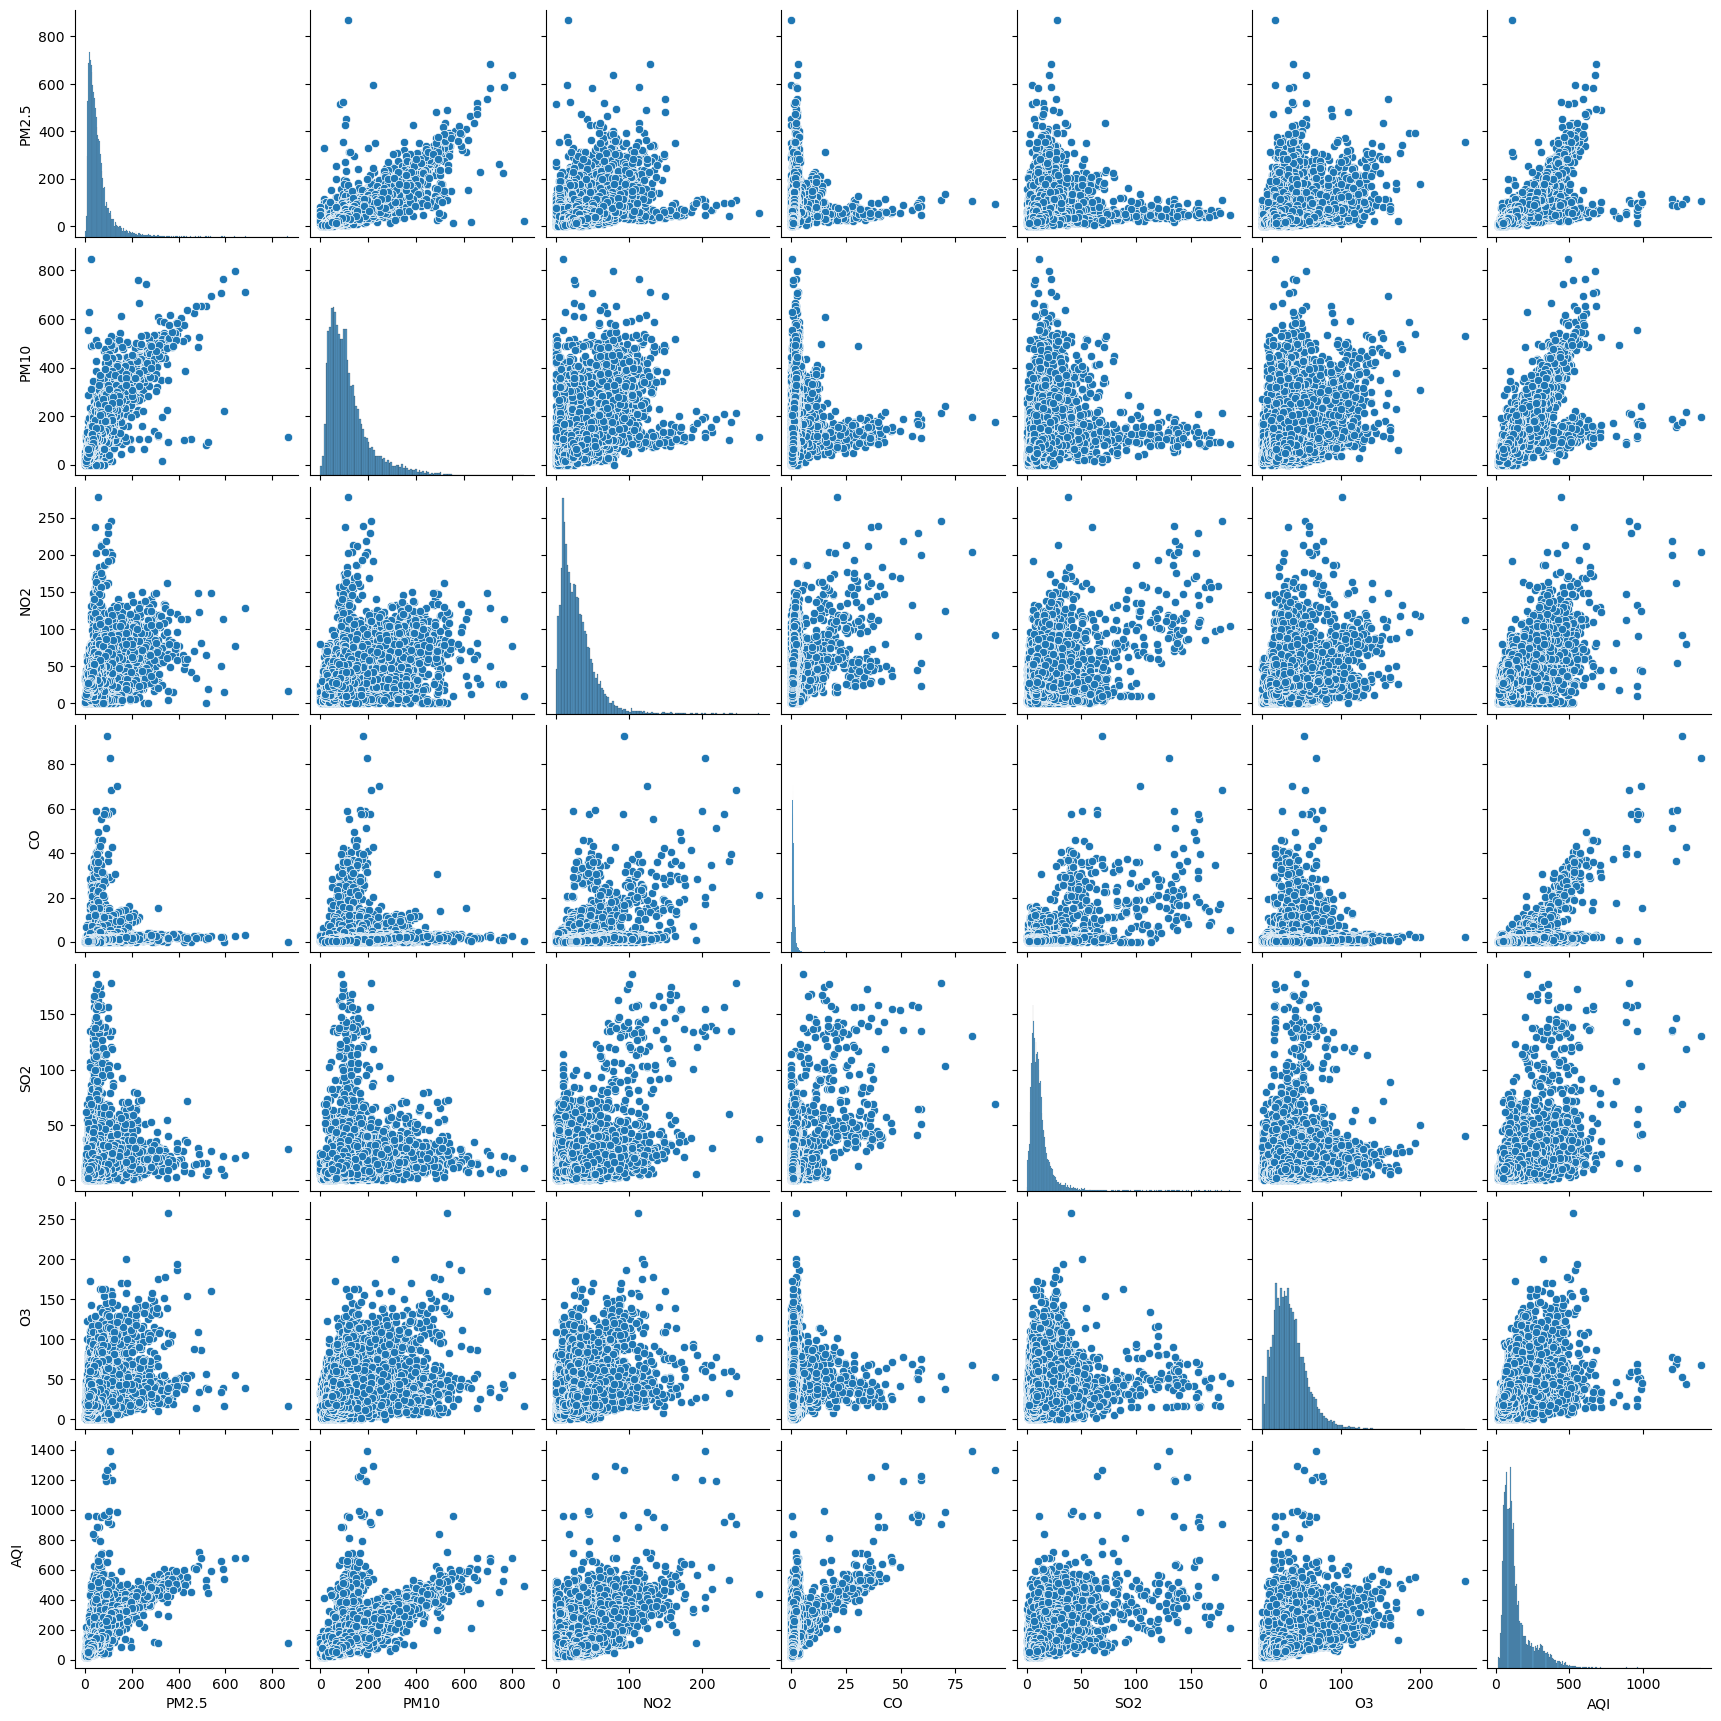

In [112]:
import numpy as np
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.pairplot(data=dataset)
plt.show()

In [113]:
input_data=dataset.iloc[:,:-1]
output_data=dataset["AQI"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.25)
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_test)
model_rf.score(x_test,y_test)*100

92.07716062035628

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb.fit(x_train, y_train)

y_pred_gb = model_gb.predict(x_test)
model_gb.score(x_test,y_test)*100

91.63003765707015

In [115]:
!pip install xgboost

In [116]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(x_train, y_train)
model_xgb.score(x_test,y_test)*100

91.07922379332257

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = model_rf.predict(x_test)  

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))
# output=MAE: 13.44
#RMSE: 20.69
#R²: 0.9459

MAE: 16.81
RMSE: 30.0
R²: 0.9208


In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = model_gb.predict(x_test)  

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))

MAE: 17.86
RMSE: 30.84
R²: 0.9163


In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = model_xgb.predict(x_test)  

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))

MAE: 17.12
RMSE: 31.84
R²: 0.9108


In [120]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define model
xgb = XGBRegressor()

# Define parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5)
}

# Randomized Search
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search.fit(x_train, y_train)

# Best parameters
print("Best Params:", random_search.best_params_)


Best Params: {'learning_rate': 0.027425083650459835, 'max_depth': 7, 'n_estimators': 199, 'subsample': 0.5714334089609704}


In [121]:
xgb = XGBRegressor(learning_rate=0.0274, max_depth=7, n_estimators=199, subsample=0.5714)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.0274, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=199,
             n_jobs=None, num_parallel_tree=None, ...)

In [122]:
accuracy = xgb.score(x_test, y_test) * 100
print("Model Accuracy: {:.2f}%".format(accuracy))

Model Accuracy: 91.38%


In [123]:
clfs = {
    'rf':RandomForestRegressor(),
    'gbr':GradientBoostingRegressor(),
    'xgb':XGBRegressor()
}
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=r2_score(y_test,y_pred)
    return accuracy

accuracy_scores = []
for name,clf in clfs.items():
    current_accuracy = train_classifier(clf,x_train,y_train,x_test,y_test)
    accuracy_scores.append(current_accuracy)

In [124]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)

In [125]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

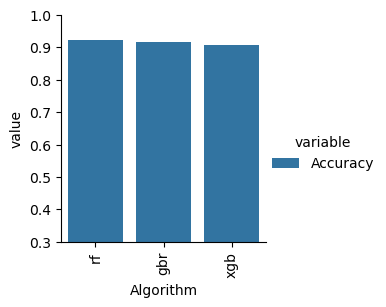

In [126]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=3)
plt.ylim(0.3,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [131]:
import pickle
pickle.dump(model_xgb, open("model.pkl", "wb"))

In [132]:
model_xgb.score(X_test,y_test)*100

95.20303706252659